# Numerical Integration

Below is an implementation of the trapezoid rule, a common numerical integration technique.

In [1]:
function trapezoid(f, a, b, n)
    h = (b-a) / n
    domain = a:h:b
    
    pairs = zip(domain[1:end-1], domain[2:end])
    sum(h * (f(an) + f(bn)) / 2 for (an, bn) in pairs)
end

trapezoid (generic function with 1 method)

Even for very small choices of n, this technique quickly converges to the exact solution, $\frac{\sqrt{\pi}}{2} \text{erf} (\frac{\pi}{4}) \approx 0.64988$.

In [25]:
using SpecialFunctions

f(x) = exp(-x^2)
a, b = 0, pi/4

exact = sqrt(pi)/2 * erf(pi/4)

trapezoid.(f, a, b, [2, 4, 8, 16]), exact

([0.6388862805734845, 0.6471507696813965, 0.6491991053630145, 0.6497100964398596], 0.6498803300786572)

# Simpson's Rule

Simpson's rule is another numerical integration technique that evaluates the function at 3 points per iteration, instead of 2. The following is an implementation:

In [3]:
function simpson(f, a, b, h)
    domain = a:h:b
    
    pairs = zip(domain[1:end-1], domain[2:end])
    sum((bn - an) / 6 * (f(an) + 4f((an + bn) / 2) + f(bn)) for (an, bn) in pairs)
end

simpson (generic function with 1 method)

We can experimentally find the order of this method by considering the error at multiple values of h, and performing a linear fit on the log of the error.

In [23]:
h_vals = [1/2^n for n in 2:9]

8-element Vector{Float64}:
 0.25
 0.125
 0.0625
 0.03125
 0.015625
 0.0078125
 0.00390625
 0.001953125

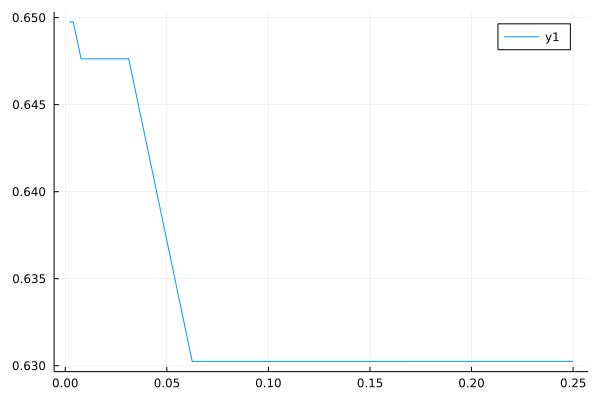

In [26]:
using Plots

error(h) = abs(exact - simpson(f, a, b, h))
plot(h_vals, simpson.(f, a, b, h_vals))

Recall our method to perform a linear fit:

In [18]:
function linear_fit(x, y)
    n = length(x)
    
    b = [sum(y); sum([xn * yn for (xn, yn) in zip(x, y)])]
    A = [n      sum(x);
         sum(x) sum([xn^2 for xn in x])]
    
    det = A[1, 1]*A[2, 2] - A[1, 2]*A[2, 1]
    inv = [A[2, 2] -A[1, 2]; -A[2, 1] A[1, 1]]
    b, a = 1/det * inv * b
    
    return a, b
end

linear_fit (generic function with 1 method)